## Part 2 Analysing Toronto Neighbourhoods based on the crime rate

In [1]:
import pandas as pd
import requests
 
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
 
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "fc4d95a6-591f-411f-af17-327e6c5d03c7"}
package = requests.get(url, params = params).json()
#print(package["result"])
 
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
 
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df_torontocrime = pd.DataFrame(data["result"]["records"])
        break
df_torontocrime.head()

,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,...,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry
0,1,16,South Parkdale,085,21849,202,226,231,229,220,...,9,10,9,22,10.0,1.44,100.7,2.286974e+06,10802.832160,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4277..."
1,2,17,South Riverdale,070,27876,215,207,236,243,304,...,22,27,24,21,21.3,-0.13,75.3,1.096457e+07,43080.724701,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3286..."
2,3,18,St.Andrew-Windfields,040,17812,53,41,48,45,55,...,8,7,6,6,8.5,0.00,33.7,7.299580e+06,13025.997456,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3438..."
3,4,19,Taylor-Massey,061,15683,127,92,97,107,123,...,5,2,4,3,3.5,-0.25,19.1,1.062970e+06,5940.700050,"{""type"": ""Polygon"", ""coordinates"": [[[-79.2877..."
4,5,20,Humber Summit,021,12416,76,89,118,116,109,...,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118,"{""type"": ""Polygon"", ""coordinates"": [[[-79.5806..."


In [2]:
!conda install -c conda-forge geopy --yes 


Solving environment: done

# All requested packages already installed.



In [3]:
!pip install geopandas


import pandas as pd #used to read in the revenue file 
import matplotlib.pyplot as plt #for plotting
#to read in shape file and provides high #level interface with #matplotlib library for making maps
import geopandas as gpd

     |████████████████████████████████| 1.0MB 15.2MB/s eta 0:00:01
     |████████████████████████████████| 6.5MB 17.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 14.8MB 6.9MB/s eta 0:00:01     |█████████████████████▉          | 10.1MB 6.6MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [4]:
import sys
>>> 'geopandas' in sys.modules

True

In [5]:
df_torontocrime = df_torontocrime[df_torontocrime.columns.drop(list(df_torontocrime.filter(regex='AVG''Legnth''Area''CHG''Rate''Length')))]

In [6]:
pd.set_option('display.max_columns', None)


df_torontocrime.head()


,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry
0,1,16,South Parkdale,085,21849,202,226,231,229,220,251,226.5,0.14,1148.8,13,20,23,19,17,20,18.7,0.18,91.5,45,51,71,58,78,89,65.3,0.14,407.3,0,0,1,0,0,1,0.3,1.0,4.6,24,35,41,30,35,33,33.0,-0.06,151.0,6,4,9,10,9,22,10.0,1.44,100.7,2.286974e+06,10802.832160,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4277..."
1,2,17,South Riverdale,070,27876,215,207,236,243,304,261,244.3,-0.14,936.3,18,23,27,37,40,40,30.8,0.00,143.5,89,98,148,94,91,133,108.8,0.46,477.1,1,0,3,5,2,0,1.8,-1.0,0.0,64,42,49,64,40,35,49.0,-0.13,125.6,18,16,22,27,24,21,21.3,-0.13,75.3,1.096457e+07,43080.724701,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3286..."
2,3,18,St.Andrew-Windfields,040,17812,53,41,48,45,55,58,50.0,0.05,325.6,15,25,10,15,21,35,20.2,0.67,196.5,81,79,57,91,81,83,78.7,0.02,466.0,1,0,0,2,0,0,0.5,0.0,0.0,8,5,14,0,4,12,7.2,2.00,67.4,10,14,8,7,6,6,8.5,0.00,33.7,7.299580e+06,13025.997456,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3438..."
3,4,19,Taylor-Massey,061,15683,127,92,97,107,123,122,111.3,-0.01,777.9,11,9,7,5,12,12,9.3,0.00,76.5,31,71,43,27,41,63,46.0,0.54,401.7,0,1,1,1,0,1,0.7,1.0,6.4,24,37,16,20,16,13,21.0,-0.19,82.9,4,3,5,2,4,3,3.5,-0.25,19.1,1.062970e+06,5940.700050,"{""type"": ""Polygon"", ""coordinates"": [[[-79.2877..."
4,5,20,Humber Summit,021,12416,76,89,118,116,109,118,104.3,0.08,950.4,66,42,62,83,106,135,82.3,0.27,1087.3,54,44,41,40,56,57,48.7,0.02,459.1,0,1,0,2,1,3,1.2,2.0,24.2,22,23,23,27,31,28,25.7,-0.10,225.5,15,16,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118,"{""type"": ""Polygon"", ""coordinates"": [[[-79.5806..."


In [7]:
#df_torontocrime['Total'] = df_torontocrime.sum(axis=1)

col_list= list(df_torontocrime)
col_list.remove('_id')
col_list.remove('OBJECTID')
col_list.remove('Neighbourhood')
col_list.remove('Hood_ID')
col_list.remove('Population')
col_list.remove('geometry')


col_list

df_torontocrime['Total'] = df_torontocrime[col_list].sum(axis=1)

df_torontocrime['Crime Ratio']= df_torontocrime['Total']/df_torontocrime['Population']



In [8]:
df_torontocrime.head()

df_crime= df_torontocrime[['Neighbourhood','Crime Ratio']]

In [9]:
df_crime.columns = ['Neighbourhood', 'Crime Ratio']


In [10]:
import geopandas as gpd
Toronto = gpd.read_file('toronto.geojson')
Toronto.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Trinity-Bellwoods,1,2013-02-21T04:41:39.808998+00:00,2013-02-21T04:41:40.047001+00:00,"MULTIPOLYGON (((-79.40428 43.64798, -79.40396 ..."
1,West Humber-Clairville,2,2013-02-21T04:41:39.808998+00:00,2013-02-21T04:41:40.047001+00:00,"MULTIPOLYGON (((-79.56668 43.71179, -79.56422 ..."
2,Mount Olive-Silverstone-Jamestown,3,2013-02-21T04:41:39.808998+00:00,2013-02-21T04:41:40.047001+00:00,"MULTIPOLYGON (((-79.57825 43.73552, -79.57800 ..."
3,Humber Summit,4,2013-02-21T04:41:39.808998+00:00,2013-02-21T04:41:40.047001+00:00,"MULTIPOLYGON (((-79.55762 43.74881, -79.55872 ..."
4,Thistletown-Beaumond Heights,5,2013-02-21T04:41:39.808998+00:00,2013-02-21T04:41:40.047001+00:00,"MULTIPOLYGON (((-79.55390 43.72960, -79.55402 ..."


In [11]:
neighborhoods_data = Toronto[['name','geometry']]

In [12]:
neighborhoods_data.columns = ['Neighbourhood', 'geometry']


In [13]:
neighborhoods_data.head()

,Neighbourhood,geometry
0,Trinity-Bellwoods,"MULTIPOLYGON (((-79.40428 43.64798, -79.40396 ..."
1,West Humber-Clairville,"MULTIPOLYGON (((-79.56668 43.71179, -79.56422 ..."
2,Mount Olive-Silverstone-Jamestown,"MULTIPOLYGON (((-79.57825 43.73552, -79.57800 ..."
3,Humber Summit,"MULTIPOLYGON (((-79.55762 43.74881, -79.55872 ..."
4,Thistletown-Beaumond Heights,"MULTIPOLYGON (((-79.55390 43.72960, -79.55402 ..."


In [14]:
df_torontocrime= pd.merge(neighborhoods_data,df_crime, on= 'Neighbourhood',  how = 'inner')

In [15]:
df_torontocrime.head()

,Neighbourhood,geometry,Crime Ratio
0,Trinity-Bellwoods,"MULTIPOLYGON (((-79.40428 43.64798, -79.40396 ...",105.016548
1,West Humber-Clairville,"MULTIPOLYGON (((-79.56668 43.71179, -79.56422 ...",906.068576
2,Mount Olive-Silverstone-Jamestown,"MULTIPOLYGON (((-79.57825 43.73552, -79.57800 ...",141.255369
3,Humber Summit,"MULTIPOLYGON (((-79.55762 43.74881, -79.55872 ...",643.073205
4,Humbermede,"MULTIPOLYGON (((-79.53391 43.73468, -79.53539 ...",285.492369


In [16]:
from geopandas import GeoDataFrame

df_torontocrime = GeoDataFrame(df_torontocrime)


!pip install mapclassify

!pip install pysal==2.0.0

     |████████████████████████████████| 1.6MB 17.3MB/s eta 0:00:01     |█████████████████████████████▍  | 1.5MB 17.3MB/s eta 0:00:01
     |████████████████████████████████| 25.0MB 564kB/s eta 0:00:012
     |████████████████████████████████| 112kB 38.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


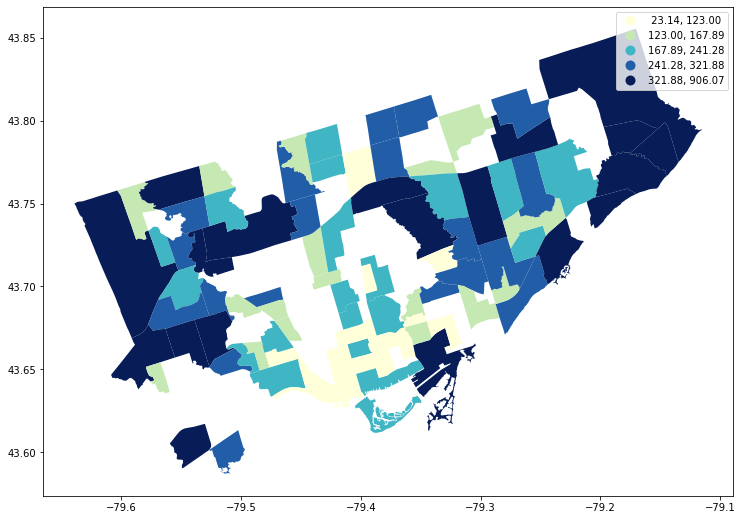

In [17]:
ax = df_torontocrime.dropna().plot(column='Crime Ratio', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=5, legend =  
                                  True);

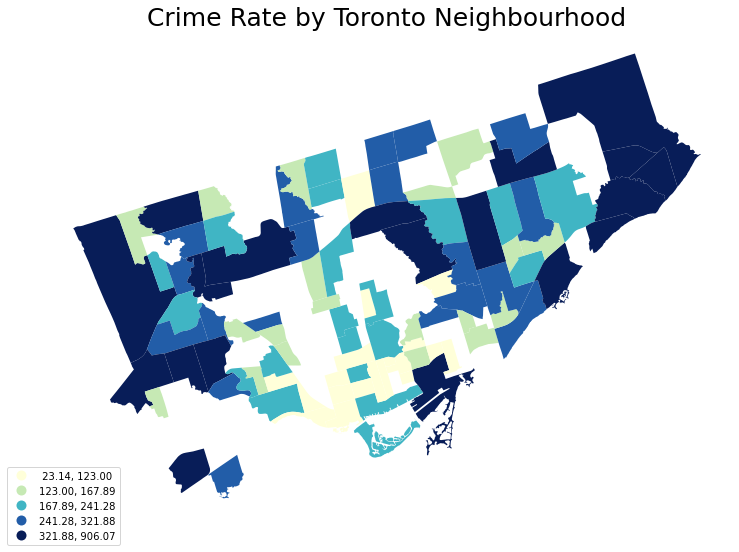

In [18]:
#add title to the map
ax.set_title('Crime Rate by Toronto Neighbourhood', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.12))
ax.get_figure()

In [21]:
df_crime.sort_values(by=['Crime Ratio'], inplace=True, ascending=True)
df_crime123= df_crime.head(15)
#df_crime123.reset_index(drop=True, inplace=True) 

df_crime123.reset_index(inplace=True) # Resets the index, makes factor a column
df_crime123.drop("index",axis=1,inplace=True)
#df_crime123.drop('index', inplace=True, axis=1)
df_crime123.drop(df_crime123.columns[0], axis=1)
#df_crime123['Crime Ratio'] = df_crime123['Crime Ratio'].astype(float)

df_crime123.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighbourhood,Crime Ratio
0,North St.James Town,23.141653
1,Church-Yonge Corridor,44.119830
2,Mount Pleasant West,45.552625
3,Regent Park,60.836657
4,Taylor-Massey,68.329983
5,Bay Street Corridor,70.921722
6,High Park North,85.314611
7,Kensington-Chinatown,86.292275
8,Annex,91.834734
9,Willowdale East,100.596188


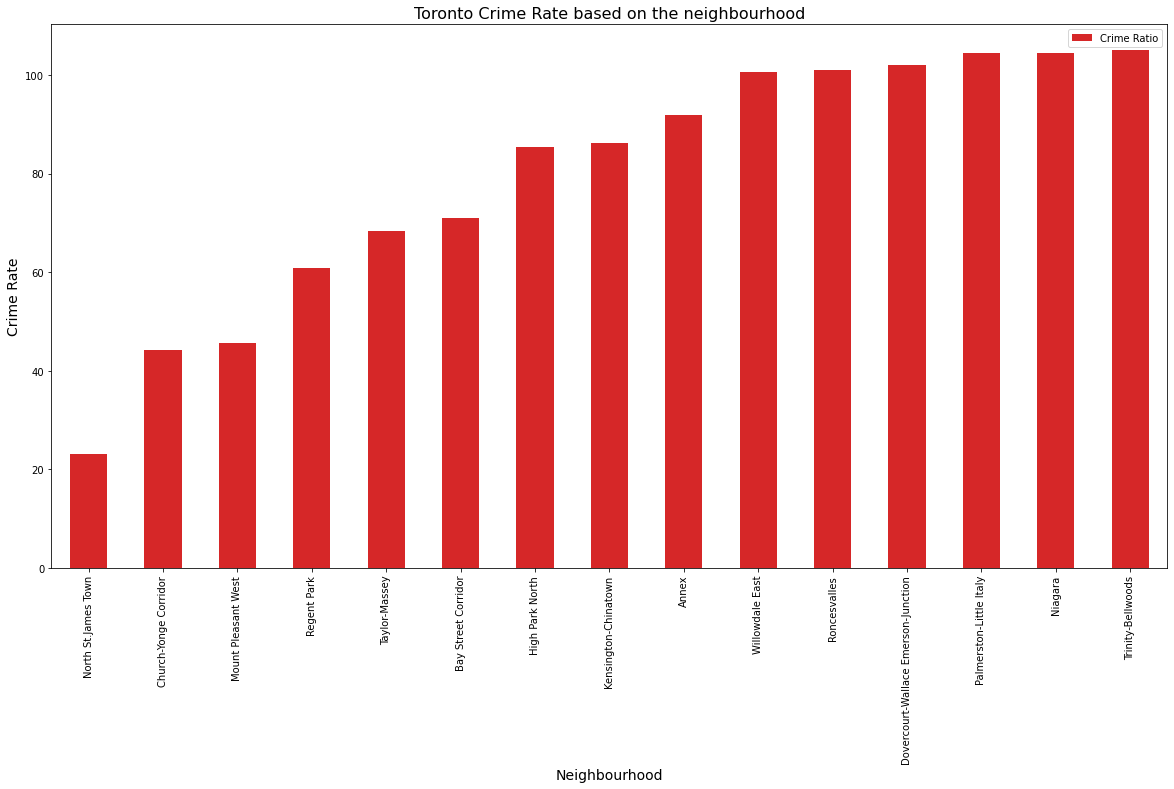

In [20]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt



df_crime123.plot(x='Neighbourhood', y='Crime Ratio', kind='bar', color="C3", stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             ) 

plt.title('Toronto Crime Rate based on the neighbourhood', fontsize=16)
plt.ylabel('Crime Rate',fontsize=14)
plt.xlabel('Neighbourhood',fontsize=14)

plt.show()
